# 1. Dependancies and Dataset

## 1.1 Importing dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import HTML
!pip install chart_studio
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from string import punctuation
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

## 1.2 Reading and preparation of data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
data = data[['text','target']]
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 2. Data Exploration

## 2.1 Visualising counts of real and fake tweets

In [6]:
fig = px.bar(x=["0","1"], y=data["target"].value_counts(),
             color=["red", "goldenrod"])

#Change this value for bar widths
for dt in fig.data:
    dt["width"] = 0.4 

fig.update_layout(
    title_text = "Counts for Disaster and Non-Disaster Tweets",
    title_x=0.5,
    width=800,
    height=550,
    xaxis_title="Targets",
    yaxis_title="Count",
    showlegend=False
).show()

# py.plot(fig,filename='Counts for Disaster and Non-Disaster Tweets',auto_open=False,show_link=False)


<div>
    <a href="https://plotly.com/~raklugrin01/1/?share_key=hgjA8Zkl35RjZtywNHe0jm" target="_blank" title="Counts for Disaster and Non-Disaster Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/1.png?share_key=hgjA8Zkl35RjZtywNHe0jm" alt="Counts for Disaster and Non-Disaster Tweets" style="max-width: 100%;width: 1000px;"  width="1000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:1" sharekey-plotly="hgjA8Zkl35RjZtywNHe0jm" src="https://plotly.com/embed.js" async></script>
</div>

## 2.2 Visualising lengths of tweets

In [7]:
word_len_dis = data[data['target']==1]['text'].str.split().map(lambda x : len(x))

word_len_non_dis = data[data['target']==0]['text'].str.split().map(lambda x : len(x))

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
    
    go.Histogram(x=word_len_dis,marker_line=dict(color='black'),
                 marker_line_width=1.2),row=1, col=1
    
).add_trace(
    
    go.Histogram(x=word_len_non_dis,marker_line=dict(color='black'),
                 marker_line_width=1.2),row=1, col=2
    
).update_layout(title_text="Length of words in Tweets",
                title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Length of words in Tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/3/?share_key=c65IIAyuBQBfgU1Rfovdfb" target="_blank" title="Length of words in Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/3.png?share_key=c65IIAyuBQBfgU1Rfovdfb" alt="Length of words in Tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:3" sharekey-plotly="c65IIAyuBQBfgU1Rfovdfb" src="https://plotly.com/embed.js" async></script>
</div>


## 2.3 Visualising average word lengths of tweets

In [8]:
def avgwordlen(strlist):
    sum=[]
    for i in strlist:
        sum.append(len(i))
    return sum

non_dis_data = data[data['target']==0]['text'].str.split()
dis_data = data[data['target']==1]['text'].str.split()

avgword_len_dis = dis_data.apply(avgwordlen).map(lambda x: np.mean(x))
avgword_len_non_dis = non_dis_data.apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], 
                         group_labels, bin_size=.2, colors=colors,)

fig.update_layout(title_text="Average word length in tweets",title_x=0.5,
                  xaxis_title="Text",yaxis_title="Density").show()

# py.plot(fig,filename='Average word length in tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/5/?share_key=tfNQPMyUblqOh7JL1sEiqW" target="_blank" title="Average word length in tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/5.png?share_key=tfNQPMyUblqOh7JL1sEiqW" alt="Average word length in tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:5" sharekey-plotly="tfNQPMyUblqOh7JL1sEiqW" src="https://plotly.com/embed.js" async></script>
</div>


## 2.4 Visualising most common stop words in the text data

In [9]:
def create_corpus(target):
    corpus = []
    for i in data[data['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

In [10]:
values_list = []

def analyze_stopwords(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        dic[word] += 1
    
    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[1],y=values_list[0],orientation='h',marker=dict(color= 'rgba(152, 255, 74,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[3],y=values_list[2],orientation='h',marker=dict(color= 'rgba(255, 143, 92,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top stop words in the text",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top stop words in the text',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/13/?share_key=icoxxtajqMGbKIizrTLUX0" target="_blank" title="Top stop words in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/13.png?share_key=icoxxtajqMGbKIizrTLUX0" alt="Top stop words in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:13" sharekey-plotly="icoxxtajqMGbKIizrTLUX0" src="https://plotly.com/embed.js" async></script>
</div>

## 2.5 Visualising most common punctuations in the text data

In [11]:
values_list = []

def analyze_punctuations(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        if word in punctuation:
            dic[word] += 1 
    
    x_items, y_values = zip(*dic.items())
    
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing punctuations for 0 and 1 target labels
analyze_punctuations(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))
  
fig.add_trace(
    
    go.Bar(x=values_list[0],y=values_list[1],
           marker=dict(color= 'rgba(196, 94, 255,0.8)'),
           marker_line=dict(color='black'),marker_line_width=1.2),
           row=1, col=1
    
).add_trace(
    
    go.Bar(x=values_list[2],y=values_list[3],
          marker=dict(color= 'rgba(255, 163, 102,0.8)'),
          marker_line=dict(color='black'),marker_line_width=1.2),
          row=1, col=2
    
).update_layout(title_text="Top Punctuations in the text",
                title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top Punctuations in the text',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/15/?share_key=9JgPThmm677jJmNjJTc0BZ" target="_blank" title="Top Punctuations in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/15.png?share_key=9JgPThmm677jJmNjJTc0BZ" alt="Top Punctuations in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:15" sharekey-plotly="9JgPThmm677jJmNjJTc0BZ" src="https://plotly.com/embed.js" async></script>
</div>


# 3. Data Cleaning

## 3.1 Removing unwanted text using regular expressions

In [12]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

data["Cleaned_text"] = data["text"].apply(preprocess_data)

In [13]:
data.head()

,text,target,Cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,1,resid ask ishelt place notifi offic evacu shel...
3,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


# 4. Extra Data Exploration and Analysis on Cleaned Text

## 4.1  Creating function and data for visualising words

In [14]:
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()
    
data_disaster = data[data['target'] == 1]
data_non_disaster = data[data['target'] == 0]

## 4.2 Visualising words inside Real Disaster Tweets

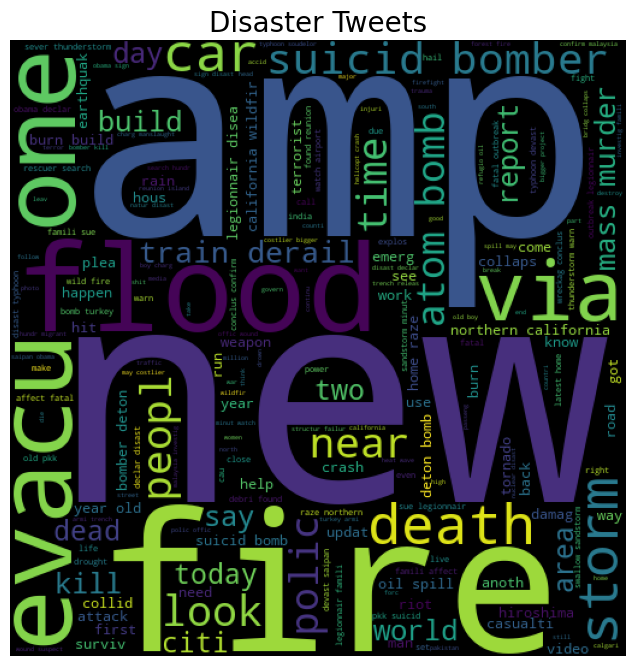

In [15]:
wordcloud(data_disaster,"Disaster Tweets")

## 4.3 Visualising words inside Fake Disaster Tweets

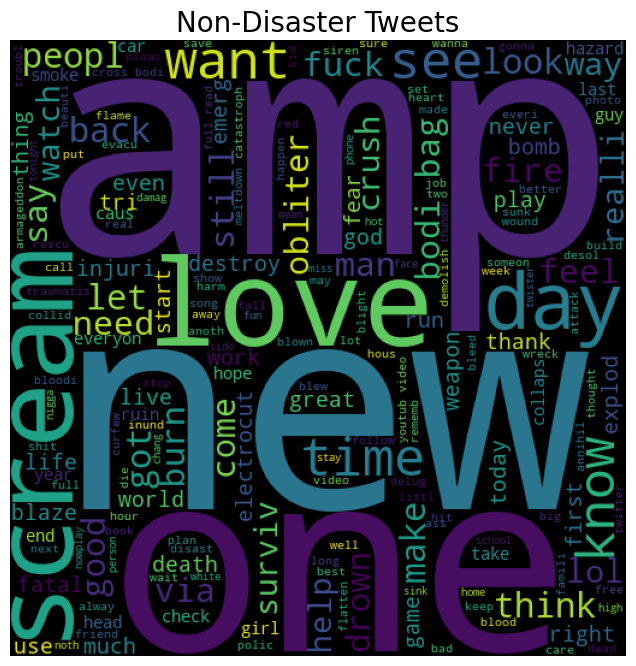

In [16]:
wordcloud(data_non_disaster,"Non-Disaster Tweets")

## 4.4 Removing unwanted words with high frequency

In [17]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data["Cleaned_text"] = data["Cleaned_text"].apply(text_cleaning)

## 4.5 Analysing top 10 N-grams where N is 1,2,3

In [18]:
def top_ngrams(data,n,grams):
    count_vec = CountVectorizer(ngram_range=(grams,grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True) 
    return word_freq[:n]

In [19]:
common_uni = top_ngrams(data["Cleaned_text"],10,1)
common_bi = top_ngrams(data["Cleaned_text"],10,2)
common_tri = top_ngrams(data["Cleaned_text"],10,3)
common_uni_df = pd.DataFrame(common_uni,columns=['word','freq'])
common_bi_df = pd.DataFrame(common_bi,columns=['word','freq'])
common_tri_df = pd.DataFrame(common_tri,columns=['word','freq'])

## 4.6 Visualising top 10 N-grams for N = 1, 2, 3

In [20]:
fig = make_subplots(rows=3, cols=1,subplot_titles=("Top 20 Unigrams in Text",
                    "Top 20 Bigrams in Text","Top 20 Trigrams in Text"))
  
fig.add_trace(
    
    go.Bar(x=common_uni_df["word"],y=common_uni_df["freq"],
           marker=dict(color= 'rgba(255, 170, 59,0.8)'),
           marker_line=dict(color='black'),marker_line_width=1.2),
           row=1, col=1

).add_trace(
    
    go.Bar(x=common_bi_df["word"],y=common_bi_df["freq"],
           marker=dict(color= 'rgba(89, 255, 147,0.8)'),
           marker_line=dict(color='black'),marker_line_width=1.2),
           row=2, col=1

).add_trace(
    
    go.Bar(x=common_tri_df["word"],y=common_tri_df["freq"],
           marker=dict(color= 'rgba(89, 153, 255,0.8)'),
           marker_line=dict(color='black'),marker_line_width=1.2),
           row=3, col=1
    
).update_layout(title_text="Visualization of Top 20 Unigrams, Bigrams and Trigrams",
                title_x=0.5,showlegend=False,
                width=800,height=1600,).update_xaxes(tickangle=-90).show()

# py.plot(fig,filename='Visualization of Top 20 Unigrams, Bigrams and Trigrams',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/17/?share_key=rHBUmASeWITErHR7rEdZqJ" target="_blank" title="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/17.png?share_key=rHBUmASeWITErHR7rEdZqJ" alt="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:17" sharekey-plotly="rHBUmASeWITErHR7rEdZqJ" src="https://plotly.com/embed.js" async></script>
</div>


# 5. Data Preprocessing 

## 5.1 Spliting original data after cleaning 

In [21]:
X_inp_clean = data['Cleaned_text']
X_inp_original = data['text']
y_inp = data['target']

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_inp_clean, y_inp, test_size=0.2, random_state=42, stratify=y_inp)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

In [23]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6090,), (1523,), (6090,), (1523,))

## 5.2 Creating function to encode data using BoW or TF-IDF

In [24]:
def encoding(train_data,valid_data,bow=False,n=1,tf_idf=False):
    if bow==True:
        cv = CountVectorizer(ngram_range=(n,n))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names())
        cv_df_valid = cv.transform(valid_data).toarray()
        valid_df = pd.DataFrame(cv_df_valid,columns=cv.get_feature_names())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(ngram_range=(n, n), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names())
        tf_df_valid = tfidf.transform(valid_data).toarray()
        valid_df = pd.DataFrame(tf_df_valid,columns=tfidf.get_feature_names())
        
    return train_df,valid_df 

## 5.3 Encoding training and validation data

In [25]:
X_train_bow1 , X_valid_bow1 = encoding(X_train,X_valid,bow=True) 
X_train_bow2 , X_valid_bow2 = encoding(X_train,X_valid,bow=True,n=2) 
X_train_bow3 , X_valid_bow3 = encoding(X_train,X_valid,bow=True,n=3) 
X_train_tfidf1 , X_valid_tfidf1 = encoding(X_train,X_valid,tf_idf=True) 
X_train_tfidf2 , X_valid_tfidf2 = encoding(X_train,X_valid,tf_idf=True,n=2) 
X_train_tfidf3 , X_valid_tfidf3 = encoding(X_train,X_valid,tf_idf=True,n=3)

# 6. Training and tuning Machine Learning Models

In [26]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

## 6.1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model_bow1_logreg = LogisticRegression()
model_bow1_logreg.fit(X_train_bow1,y_train)
pred_bow1_logreg = model_bow1_logreg.predict(X_valid_bow1)

LogisticRegression()

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       869
           1       0.82      0.73      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.81      1523

Accuracy : 0.8161523309258043


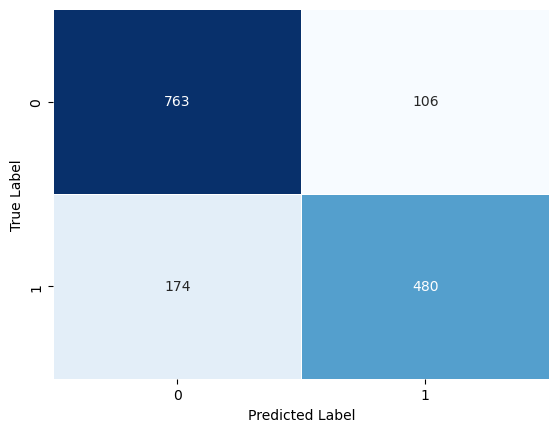

In [29]:
acc_bow1_logreg = c_report(y_valid,pred_bow1_logreg)
plot_cm(y_valid,pred_bow1_logreg)

In [30]:
model_bow2_logreg = LogisticRegression()
model_bow2_logreg.fit(X_train_bow2,y_train)
pred_bow2_logreg = model_bow2_logreg.predict(X_valid_bow2)

LogisticRegression()

Classifictaion Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       869
           1       0.89      0.45      0.60       654

    accuracy                           0.74      1523
   macro avg       0.79      0.71      0.70      1523
weighted avg       0.78      0.74      0.72      1523

Accuracy : 0.7406434668417596


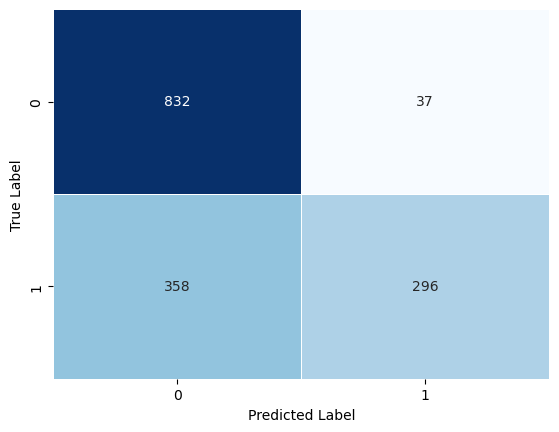

In [31]:
acc_bow2_logreg = c_report(y_valid,pred_bow2_logreg)
plot_cm(y_valid,pred_bow2_logreg)

In [32]:
model_bow3_logreg = LogisticRegression()
model_bow3_logreg.fit(X_train_bow3,y_train)
pred_bow3_logreg = model_bow3_logreg.predict(X_valid_bow3)

LogisticRegression()

Classifictaion Report
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       869
           1       0.92      0.33      0.49       654

    accuracy                           0.70      1523
   macro avg       0.79      0.65      0.64      1523
weighted avg       0.77      0.70      0.66      1523

Accuracy : 0.7005909389363099


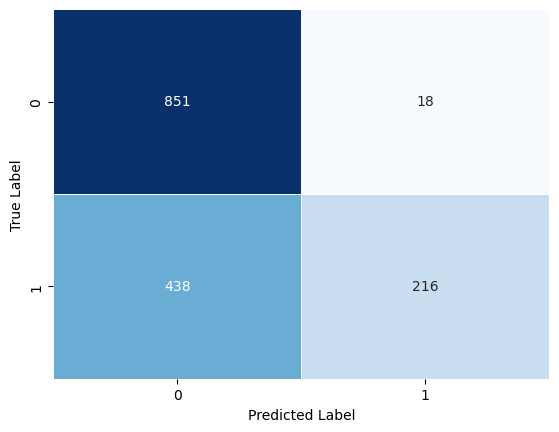

In [33]:
acc_bow3_logreg = c_report(y_valid,pred_bow3_logreg)
plot_cm(y_valid,pred_bow3_logreg)

In [34]:
model_tfidf1_logreg = LogisticRegression(C=1.0)
model_tfidf1_logreg.fit(X_train_tfidf1,y_train)
pred_tfidf1_logreg = model_tfidf1_logreg.predict(X_valid_tfidf1)

LogisticRegression()

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8207485226526592


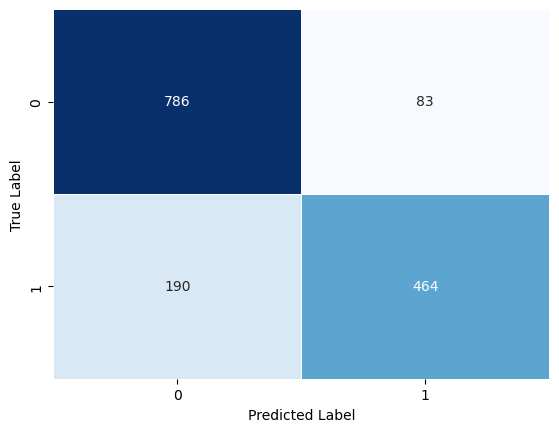

In [35]:
acc_tfidf1_logreg = c_report(y_valid,pred_tfidf1_logreg)
plot_cm(y_valid,pred_tfidf1_logreg)

## 6.2 CatBoostClassifier

In [36]:
model_tfidf1_CBC = CatBoostClassifier(iterations=100)
model_tfidf1_CBC.fit(X_train_tfidf1,y_train)
pred_tfidf1_CBC = model_tfidf1_CBC.predict(X_valid_tfidf1)

Learning rate set to 0.184063
0:	learn: 0.6742927	total: 295ms	remaining: 29.2s
1:	learn: 0.6618333	total: 396ms	remaining: 19.4s
2:	learn: 0.6520205	total: 497ms	remaining: 16.1s
3:	learn: 0.6417444	total: 594ms	remaining: 14.3s
4:	learn: 0.6351862	total: 688ms	remaining: 13.1s
5:	learn: 0.6268789	total: 785ms	remaining: 12.3s
6:	learn: 0.6205555	total: 880ms	remaining: 11.7s
7:	learn: 0.6149114	total: 979ms	remaining: 11.3s
8:	learn: 0.6095348	total: 1.07s	remaining: 10.8s
9:	learn: 0.6053483	total: 1.16s	remaining: 10.5s
10:	learn: 0.6008680	total: 1.26s	remaining: 10.2s
11:	learn: 0.5972103	total: 1.36s	remaining: 9.95s
12:	learn: 0.5937001	total: 1.45s	remaining: 9.7s
13:	learn: 0.5912498	total: 1.54s	remaining: 9.49s
14:	learn: 0.5870390	total: 1.64s	remaining: 9.28s
15:	learn: 0.5836361	total: 1.74s	remaining: 9.12s
16:	learn: 0.5799069	total: 1.83s	remaining: 8.94s
17:	learn: 0.5762295	total: 1.93s	remaining: 8.78s
18:	learn: 0.5735028	total: 2.02s	remaining: 8.62s
19:	learn: 0

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       869
           1       0.82      0.66      0.73       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Accuracy : 0.793827971109652


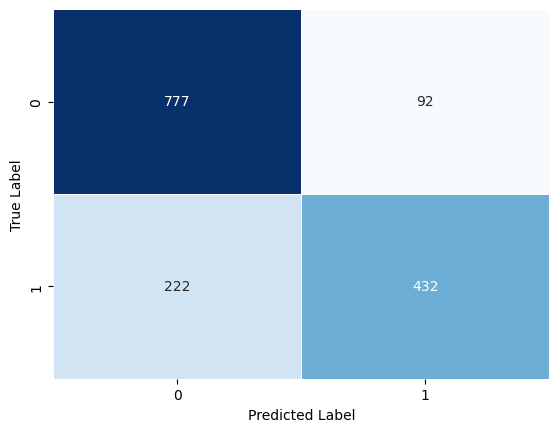

In [37]:
acc_tfidf1_CBC = c_report(y_valid,pred_tfidf1_CBC)
plot_cm(y_valid,pred_tfidf1_CBC)

## 6.3 Support Vector Classifier 

In [38]:
model_tfidf1_SVC = SVC(kernel='linear', degree=3, gamma='auto')
model_tfidf1_SVC.fit(X_train_tfidf1,y_train)
pred_tfidf1_SVC = model_tfidf1_SVC.predict(X_valid_tfidf1)

SVC(gamma='auto', kernel='linear')

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.83      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8214051214707814


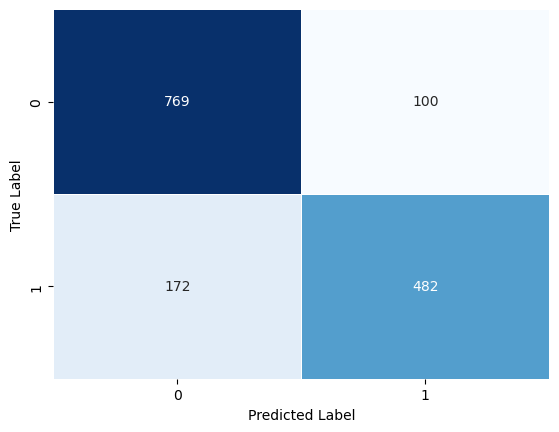

In [39]:
acc_tfidf1_SVC = c_report(y_valid,pred_tfidf1_SVC)
plot_cm(y_valid,pred_tfidf1_SVC)

## 6.4 XGB Classifier

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBClassifier

In [42]:
model_tfidf1_XGB = XGBClassifier(eval_metric='mlogloss')
model_tfidf1_XGB.fit(X_train_tfidf1,y_train)
pred_tfidf1_XGB = model_tfidf1_XGB.predict(X_valid_tfidf1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       869
           1       0.83      0.67      0.74       654

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy : 0.799080761654629


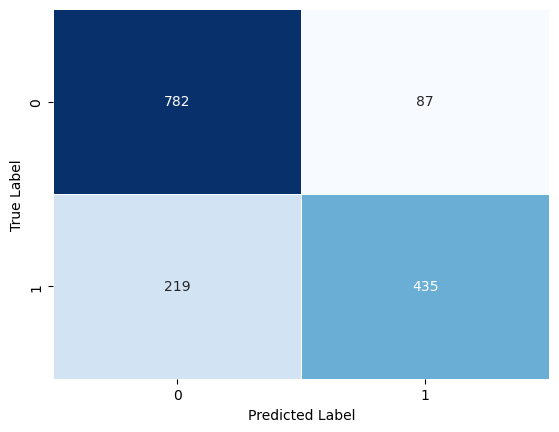

In [43]:
acc_tfidf1_XGB = c_report(y_valid,pred_tfidf1_XGB)
plot_cm(y_valid,pred_tfidf1_XGB)

## 6.5 Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model_bow1_NB = MultinomialNB(alpha=0.7)
model_bow1_NB.fit(X_train_bow1,y_train)
pred_bow1_NB = model_bow1_NB.predict(X_valid_bow1)

MultinomialNB(alpha=0.7)

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       869
           1       0.79      0.76      0.78       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.81      1523
weighted avg       0.81      0.81      0.81      1523

Accuracy : 0.8108995403808273


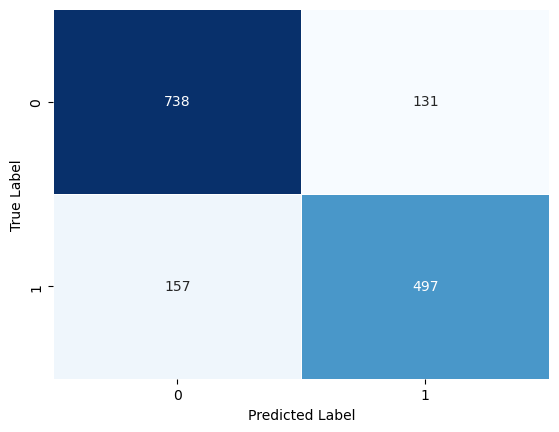

In [46]:
acc_bow1_NB = c_report(y_valid,pred_bow1_NB)
plot_cm(y_valid,pred_bow1_NB)

In [47]:
model_tfidf1_NB = MultinomialNB(alpha=0.7)
model_tfidf1_NB.fit(X_train_tfidf1,y_train)
pred_tfidf1_NB = model_tfidf1_NB.predict(X_valid_tfidf1)

MultinomialNB(alpha=0.7)

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.84      0.70      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523

Accuracy : 0.8135259356533159


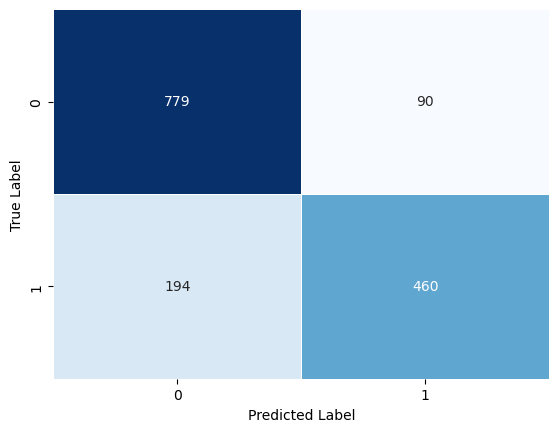

In [48]:
acc_tfidf1_NB = c_report(y_valid,pred_tfidf1_NB)
plot_cm(y_valid,pred_tfidf1_NB)

## 6.6 Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_tfidf1_RFC = RandomForestClassifier()
model_tfidf1_RFC.fit(X_train_tfidf1,y_train)
pred_tfidf1_RFC = model_tfidf1_RFC.predict(X_valid_tfidf1)

RandomForestClassifier()

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.80      0.72      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy : 0.8030203545633617


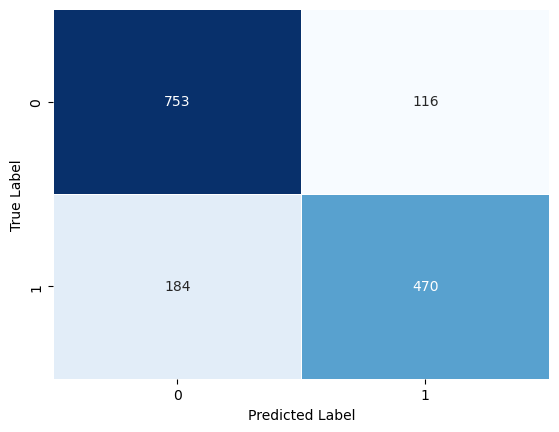

In [51]:
acc_tfidf1_RFC = c_report(y_valid,pred_tfidf1_RFC)
plot_cm(y_valid,pred_tfidf1_RFC)

## 6. Voting Classifier

In [52]:
estimators = []
estimators.append(('CB', 
                  CatBoostClassifier(iterations=100)))
estimators.append(('SVC', SVC(kernel='linear', degree=3, gamma='auto')))
estimators.append(('NB', MultinomialNB(alpha=0.7)))

model_tfidf1_VC = VotingClassifier(estimators=estimators,voting='hard')
model_tfidf1_VC.fit(X_train_tfidf1,y_train)
pred_tfidf1_VC = model_tfidf1_VC.predict(X_valid_tfidf1)

Learning rate set to 0.184063
0:	learn: 0.6742927	total: 93.2ms	remaining: 9.23s
1:	learn: 0.6618333	total: 182ms	remaining: 8.91s
2:	learn: 0.6520205	total: 271ms	remaining: 8.76s
3:	learn: 0.6417444	total: 362ms	remaining: 8.69s
4:	learn: 0.6351862	total: 456ms	remaining: 8.66s
5:	learn: 0.6268789	total: 548ms	remaining: 8.58s
6:	learn: 0.6205555	total: 639ms	remaining: 8.49s
7:	learn: 0.6149114	total: 730ms	remaining: 8.4s
8:	learn: 0.6095348	total: 821ms	remaining: 8.3s
9:	learn: 0.6053483	total: 912ms	remaining: 8.21s
10:	learn: 0.6008680	total: 1.01s	remaining: 8.2s
11:	learn: 0.5972103	total: 1.1s	remaining: 8.11s
12:	learn: 0.5937001	total: 1.19s	remaining: 8s
13:	learn: 0.5912498	total: 1.29s	remaining: 7.9s
14:	learn: 0.5870390	total: 1.38s	remaining: 7.81s
15:	learn: 0.5836361	total: 1.47s	remaining: 7.7s
16:	learn: 0.5799069	total: 1.56s	remaining: 7.61s
17:	learn: 0.5762295	total: 1.65s	remaining: 7.52s
18:	learn: 0.5735028	total: 1.74s	remaining: 7.43s
19:	learn: 0.570212

VotingClassifier(estimators=[('CB',
                              <catboost.core.CatBoostClassifier object at 0x00000188A85E44F0>),
                             ('SVC', SVC(gamma='auto', kernel='linear')),
                             ('NB', MultinomialNB(alpha=0.7))])

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       869
           1       0.84      0.73      0.78       654

    accuracy                           0.83      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.83      0.82      1523

Accuracy : 0.8260013131976363


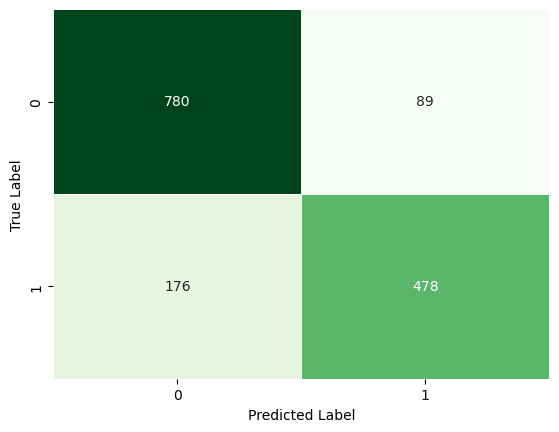

In [53]:
acc_tfidf1_VC = c_report(y_valid,pred_tfidf1_VC)
plot_cm(y_valid,pred_tfidf1_VC,cmap = "Greens")

In [54]:
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [55]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, pred_tfidf1_VC)

0.6435214557239661

In [56]:
roc = roc_auc_score(y_valid, pred_tfidf1_VC)
print('ROC: %.3f' % roc)

ROC: 0.814


# CBC

In [57]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, pred_tfidf1_CBC)

0.5779551910912378

In [58]:
roc = roc_auc_score(y_valid, pred_tfidf1_CBC)
print('ROC: %.3f' % roc)

ROC: 0.777


# SVC

In [59]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, pred_tfidf1_SVC)

0.6335527046917984

In [60]:
roc = roc_auc_score(y_valid, pred_tfidf1_SVC)
print('ROC: %.3f' % roc)

ROC: 0.811


# NB

In [61]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, pred_tfidf1_NB)

0.6181088957117101

In [62]:
roc = roc_auc_score(y_valid, pred_tfidf1_NB)
print('ROC: %.3f' % roc)

ROC: 0.800
